# Classifying digits: Multi-class classification
---

we’ll build a model to classify digits into 10 mutually exclusive classes. Because we have many classes, this problem is an instance of multi-class classification.

The problem we’re trying to solve here is to classify grayscale images of handwritten digits (28 × 28 pixels) into their 10 categories (0 through 9). We’ll use the MNIST dataset. It’s a set of 60,000 training
images, plus 10,000 test images, assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s.

### Load and visualize the data set 


In [12]:
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.utils import to_categorical

# this module has the mnist data set
from tensorflow.keras.datasets import cifar10

import numpy as np
import matplotlib.pyplot as plt

In [13]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

print(train_images.shape)
print(test_images.shape)

170508288/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


(32, 32, 3)
[7]


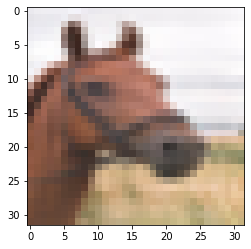

In [16]:
sample = 99
print(test_images[sample].shape)
print(test_labels[sample])

plt.imshow(test_images[sample])

Before training, we’ll preprocess the data by reshaping it into the shape the model expects and scaling it so that all values are in the [0, 1] interval. Previously, our training images were stored in an array of shape (60000, 28, 28) of type uint8 with values in the [0, 255] interval. We’ll transform it into a float32 array of shape (60000, 28 * 28) with values between 0 and 1.

In [18]:
train_images_standard = train_images.reshape((50000, 32*32*3))
train_images_standard = train_images_standard.astype('float32') / 255

test_images_standard = test_images.reshape((10000, 32*32*3))
test_images_standard  = test_images_standard.astype('float32') / 255

print(train_images.shape)
print(train_images_standard.shape)

(50000, 32, 32, 3)
(50000, 3072)


In [19]:
print(train_labels[:5])
print(train_labels.shape)

train_labels_standard = to_categorical(train_labels)
test_labels_standard = to_categorical(test_labels)

print(train_labels_standard[:5])
print(train_labels_standard.shape)

[[6]
 [9]
 [9]
 [4]
 [1]]
(50000, 1)
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
(50000, 10)


In [26]:
model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(3072,)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer="rmsprop", loss='categorical_crossentropy', metrics=['accuracy'])
# model.compile(optimizer=optimizers.SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16)                49168     
                                                                 
 dense_13 (Dense)            (None, 8)                 136       
                                                                 
 dense_14 (Dense)            (None, 4)                 36        
                                                                 
 dense_15 (Dense)            (None, 10)                50        
                                                                 
Total params: 49,390
Trainable params: 49,390
Non-trainable params: 0
_________________________________________________________________


There are two other things you should note about this architecture:

1. We end the model with a Dense layer of size 10. This means for each input
sample, the network will output a 10-dimensional vector. Each entry in this vector (each dimension) will encode a different output class.

2. The last layer uses a softmax activation.It means the model will output a probability distribution over the 10 different output classes—for every input sample, the model will produce a 10-dimensional output vector, where output[i] is the probability that the sample belongs to class i. The 10 scores will sum to 1.

The **softmax** activation function transforms the raw outputs of the neural network into a vector of probabilities, essentially a probability distribution over the input classes.

\begin{align}
softmax(x_i) = \frac{e^{x_i}}{\sum^n_{j=1} e^{x_j}}
\end{align}

The best loss function to use in this case is categorical_crossentropy. It measures the distance between two probability distributions: here, between the probability distribution output by the model and the true distribution of the labels. By minimizing the distance between these two distributions, you train the model to output something as close as possible to the true labels. The function is defined as:

\begin{align}
CCE(y, \hat{y}) = -\sum_i y_i \cdot \ln(\hat{y}_i)
\end{align}

In [27]:
history = model.fit(train_images_standard, train_labels_standard, epochs=25, validation_split=0.2)

Epoch 1/25
1250/1250 [==============================] - 4s 3ms/step - loss: 2.1669 - accuracy: 0.1686 - val_loss: 2.0865 - val_accuracy: 0.2008
Epoch 2/25
1250/1250 [==============================] - 4s 3ms/step - loss: 2.0442 - accuracy: 0.2137 - val_loss: 2.0154 - val_accuracy: 0.2140
Epoch 3/25
1250/1250 [==============================] - 4s 3ms/step - loss: 2.0004 - accuracy: 0.2367 - val_loss: 1.9802 - val_accuracy: 0.2426
Epoch 4/25
1250/1250 [==============================] - 4s 3ms/step - loss: 1.9556 - accuracy: 0.2609 - val_loss: 1.9407 - val_accuracy: 0.2646
Epoch 5/25
1250/1250 [==============================] - 4s 3ms/step - loss: 1.9100 - accuracy: 0.2853 - val_loss: 1.9014 - val_accuracy: 0.2849
Epoch 6/25
1250/1250 [==============================] - 3s 3ms/step - loss: 1.8870 - accuracy: 0.2955 - val_loss: 1.8887 - val_accuracy: 0.2944
Epoch 7/25
1250/1250 [==============================] - 3s 3ms/step - loss: 1.8717 - accuracy: 0.3052 - val_loss: 1.8819 - val_accuracy:

In [28]:
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

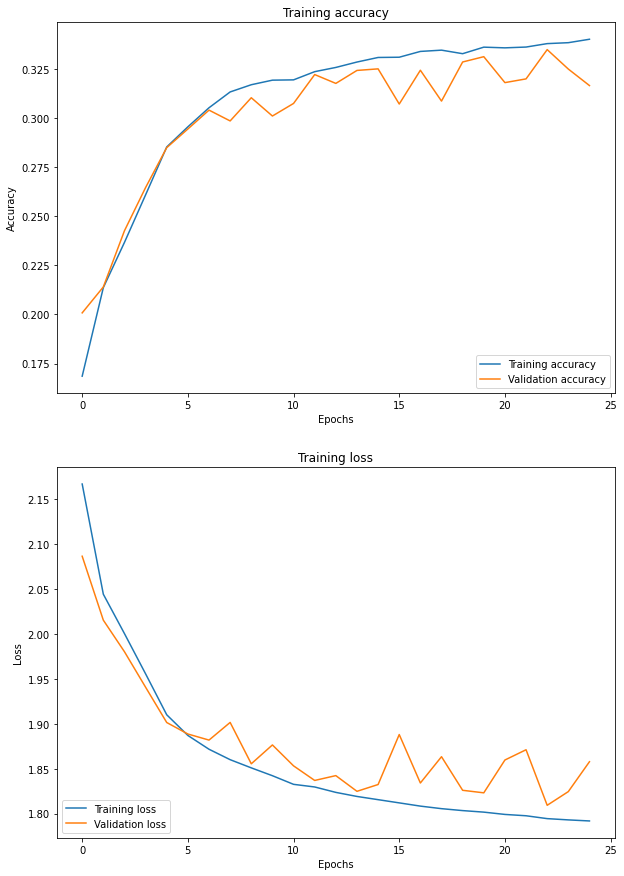

In [29]:
fig, ax = plt.subplots(2, 1, figsize=(10, 15))
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].plot(acc_values, label="Training accuracy")
ax[0].plot(val_acc_values, label="Validation accuracy")
ax[0].set_title("Training accuracy")
ax[0].legend(loc='lower right')

ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].plot(loss_values, label="Training loss")
ax[1].plot(val_loss_values, label="Validation loss")
ax[1].set_title("Training loss")
ax[1].legend(loc='lower left')


Now, we evaluate the model on the test data:

In [30]:
test_results = model.evaluate(test_images_standard, test_labels_standard)
print(test_results)

313/313 [==============================] - 1s 2ms/step - loss: 1.8497 - accuracy: 0.3145
[1.8497425317764282, 0.31450000405311584]


And we can male predictions:

[[0.    0.    0.    0.037 0.    0.13  0.    0.1   0.    0.733]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
9


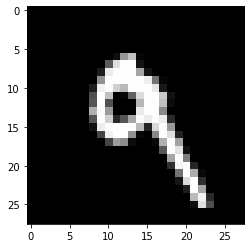

In [11]:
test_image = 7

input_image = test_images[test_image].reshape((1, 784))
input_image = input_image.astype('float32') / 255

prediction = model.predict(input_image)

np.set_printoptions(precision=3, suppress=True)
print(prediction)
print(test_labels_standard[test_image])

plt.imshow(test_images[test_image],  cmap='gray')

print(np.argmax(prediction))